# PRACTICA
  *  Obtener un intervalo de confianza en un modelo de regresión lineal múltiple tras determinar el conjunto de variables significativas más adecuado. Al terminar este proceso, deberás validar los supuestos necesarios para tener un modelo robusto.

### * 1.- Considera la base de datos del archivo de Kaggle “Advertising.csv” donde el objetivo es el de pronosticar las ventas de una empresa a partir de las cantidades que invierte en anuncios de TV, Radio y Periódicos.

### * 2.- Construye un modelo de regresión lineal múltiple adecuado para pronosticar las ventas de la empresa bajo análisis, de manera que sólo queden variables significativas en su ecuación final. Contempla para este caso 70% de los datos como grupo de aprendizaje (entrenamiento) y el resto para el grupo de prueba con una semilla de 1 ¿Qué tan bueno es el ajuste?

### * 3.- Determina con la ecuación obtenida de los datos de aprendizaje, un intervalo de confianza del 90%, para las ventas cuando las cantidades invertidas en TV, Radio y Periódicos son de 100, 50 y 70 respectivamente. 

### * 4.- Valida el cumplimiento de todos los supuestos que sean aplicables a su modelo final. Considera un nivel de confianza del 90% para los casos que sea posible, interpretando verbalmente cada uno de sus resultados. 4. 

### * 5.- Verifica que los resultados obtenidos por las librerías de Python para el cálculo del Sesgo, la Curtosis, el estadístico de Durbin-Watson y la prueba de Heterocedasticidad de White corresponden a aquellos que obtendría si las calculara mediante las fórmulas descritas en esta lección (a través de funciones creadas por usted).

In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
sales_df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M53 DS/Advertising.csv')
sales_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
X = sales_df[['TV','Radio','Newspaper']].values  
Y = sales_df[['Sales']].values

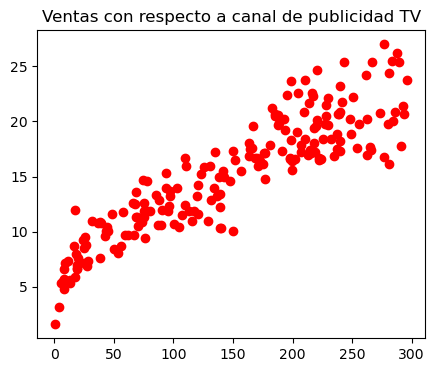

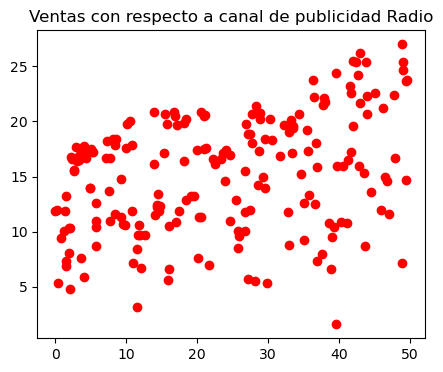

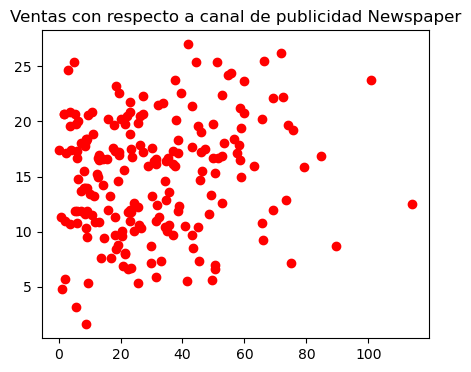

In [17]:
# graficamos para ver la distribución de los datso

cols = ['TV','Radio','Newspaper']
for col in cols:
    plt.figure(figsize = (5,4))
    plt.plot(sales_df[col], sales_df['Sales'], 'ro')
    plt.title(f'Ventas con respecto a canal de publicidad {col}')
    plt.show()

### * Observaciones:

* Podemos observar en la grafica de TV, entre mas publicidad hay, más ventas hay, existe una correlación entre publicidad y venta
* La publicidad en Radio, si hay un aumento de la publicidad pero ya no hay una correlación tan clara que indique que entre más publicidad haya más ventas.
* En peridioco no hay correlacion alguna.

In [20]:
# Modelo de resgresion Lineal multiple

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

RMSE :  2.370659971225658
R2 : 0.9071151423684273


<Axes: >

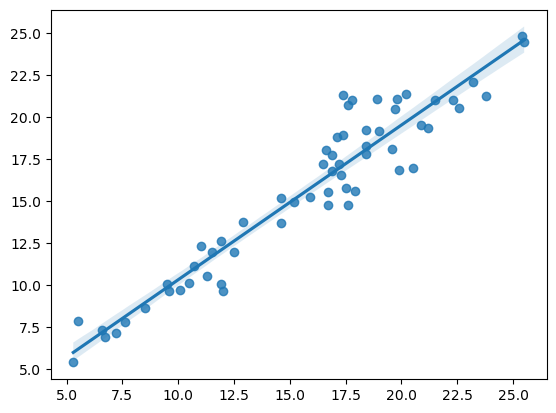

In [34]:
# dividimos nuestroc onjunto de datos en entrenamiento y test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

# inicializamos y entrenamos el modelo
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)

# hacemos predicciones
y_pred = model_reg.predict(X_test)

# obtenemos metricas, evaluamos el modelo
rmse = mean_squared_error(Y_test, y_pred)
print('RMSE : ', rmse)
print('R2 :', r2_score(Y_test, y_pred))

#graficamos

sns.regplot(x = Y_test, y = y_pred)

RMSE :  2.3645069433762362
R2 : 0.9073562242286407


<Axes: >

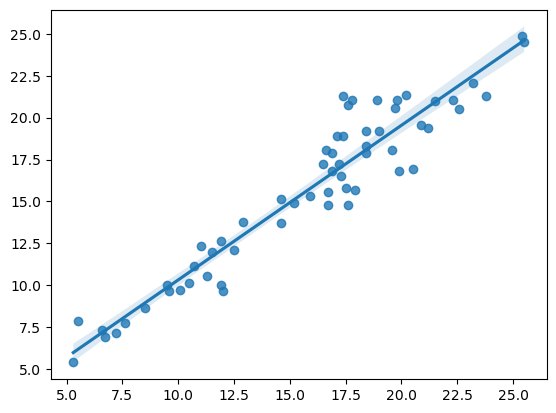

In [35]:
# dividimos nuestroc onjunto de datos en entrenamiento y test

X1 = sales_df[['TV','Radio']] # utilizamos solo 2 variables
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3, random_state = 1)

# inicializamos y entrenamos el modelo
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)

# hacemos predicciones
y_pred = model_reg.predict(X_test)

# obtenemos metricas, evaluamos el modelo
rmse = mean_squared_error(Y_test, y_pred)
print('RMSE : ', rmse)
print('R2 :', r2_score(Y_test, y_pred))

#graficamos

sns.regplot(x = Y_test, y = y_pred)

###   ** Hay una mejora en los valores de las metricas cuando solo utilizamos 2 variables en el modelo 'TV','Radio', que son las que tienen mayor relavancia para el modelo.

# ¿Qué tan bueno es el ajuste?
### RMSE (Root Mean Squared Error):
* Un RMSE más bajo es mejor
** Un RMSE de aproximadamente 2.36 indica que, en promedio, las predicciones del modelo se desvían en alrededor de 2.37 unidades de las ventas reales.

### R² (Coeficiente de Determinación):
* Un R² de aproximadamente 0.90 significa que el modelo explica el 90% de la variabilidad en las ventas en función de las variables de entrada (TV, Radio, Newspaper). 
** Esto es algo positivo pero podria mejorar, lo que indica que el modelo se ajusta a los datos.

In [48]:
# obtenemos el intervalo de confinza del 90%
import statsmodels.api as sm 
from statsmodels.tools import add_constant

X_train_sm = sm.add_constant(X_train) 
model_sm = sm.OLS(Y_train, X_train_sm).fit()

# Resumen del modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     612.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.95e-69
Time:                        15:39:55   Log-Likelihood:                -272.37
No. Observations:                 140   AIC:                             550.7
Df Residuals:                     137   BIC:                             559.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6390      0.350     13.240      0.0

In [50]:
# Intervalo de confianza del 90% para las predicciones

X_val = np.array([[110,50,70]])
X_val_sm = sm.add_constant(X_val)

pred_val = model_sm.get_prediction(X_val_sm)
inter_90 = pred_val.conf_int(alpha = 0.10) # intervalo de de confianza del 90%
print(f'Intervalo de confianza del 90% para la prediccion: {inter_90}')

Intervalo de confianza del 90% para la prediccion: [[457.08129111 583.23127778]]


In [82]:
# Residuos del modelo
resid = model_sm.resid

In [79]:
# Cálculo de la Asimitreía de Residuales.
import scipy
skew = float(scipy.stats.skew(resid, bias = True))
skew

-0.512418218679359

In [59]:
# Calculo de Curtosis de Residuales.

Kurtosis = float(scipy.stats.kurtosis(resid, fisher = False))
Kurtosis

4.782590640126672

### * Supuesto 1: Supuesto de Normalidad de Residuales
####  Cálculo del estadistico de Jarque-Bera

In [60]:
JB = (len(Y) / 6 ) * (skew ** 2 + (Kurtosis -3) ** 2 / 4)
JB

35.23265928004439

In [66]:
# Nivel critico de confianza al 90%

Nivel_confianza = 0.90
n_cri_conf = scipy.stats.chi2.ppf(Nivel_confianza, df = 2)
n_cri_conf

4.605170185988092

# Conclusión

In [68]:
print('JB:',JB, ">", 'Nivel Critico:', n_cri_conf, "Dado que JB es mayor al Nivel Critico,\n Podemos rechazar la hipotesis de existencia de Normalidad en los residuales")

JB: 35.23265928004439 > Nivel Critico: 4.605170185988092 Dado que JB es mayor al Nivel Critico,
 Podemos rechazar la hipotesis de existencia de Normalidad en los residuales


### * Supuesto 2: Inexistencia de correlación entre Residuales.

In [71]:
def cal_durbin_watson(residuals):
    diff_resid = np.diff(residuals, axis = 0)
    dw_state = np.sum(diff_resid ** 2)/ np.sum(residuals ** 2)
    return dw_state

durbin_watson = cal_durbin_watson(resid)
print(f"Durbin-Watson: {durbin_watson}")

Durbin-Watson: 2.0375161916374998


# Conclusión
#### * Durbin-Watson: 2.037. Este valor es muy cercano a 2, lo que indica que no hay evidencia de autocorrelación en los residuos del modelo. Esto es positivo, ya que sugiere que los residuos son independientes entre sí, lo que es un supuesto importante para un buen ajuste de un modelo de regresión lineal.

### * Supuesto 3: Homocedasticidad (igual de varianzas)

In [85]:
from statsmodels.stats.diagnostic import het_white
exog = model_sm.model.exog
white_test = het_white(resid, exog)
print('Estadistico de Prueba:', white_test[0])
print('Valor P:', white_test[1])

Estadistico de Prueba: 11.353378151633752
Valor P: 0.044806641638718836


# Conclusión
#### * Dado que el valor p es menor que 0.05, rechazamos la hipótesis nula de homocedasticidad. Esto sugiere que hay heterocedasticidad en los residuos del modelo.

### Supuesto 4: Inexistencia de Multicolinialidad

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
X_train_sm = pd.DataFrame(X_train_sm)

In [90]:
vif = pd.DataFrame()
vif['Variable'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
print(vif)

  Variable       VIF
0    const  5.867148
1       TV  1.001352
2    Radio  1.001352


# Conclusión.
### * TV y Radio: Ambas tienen un VIF de 1. Esto indica que no hay multicolinealidad entre las variables.                   Es decir, las variables independientes TV y Radio no están correlacionadas entre sí de manera significativa, lo cual es bueno para el modelo.